In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from osgeo import ogr
from osgeo import gdal
import glob as glob
import os
import ntpath
%matplotlib inline

In [7]:
files = glob.glob('./MOD16A2_monthly/MOD16A2_wUS_A*M*.clp.tiff')

In [9]:
# open one raster to initialize

fl = files[0]

ds = gdal.Open(fl)
ET = np.array(ds.GetRasterBand(1).ReadAsArray())
ET = ET.astype(np.float16)

# clear the fill values
ET[ET>32700] = np.NaN

# remove negative values
ET[ET < 0] = np.NaN

# rescale the data to mm/month
ET *= 0.1

ct = 1

In [10]:
for fl in files[1:]:
    ds = gdal.Open(fl)
    tmp = np.array(ds.GetRasterBand(1).ReadAsArray())
    tmp = tmp.astype(np.float16)
    # clear the fill values

    tmp[tmp>32700] = np.NaN

    # remove negative values
    tmp[tmp < 0] = np.NaN

    # rescale the data to mm/month
    tmp *= 0.1
    
    ET += tmp
    
    ct += 1
  

In [5]:
ET /= ct # compute monthly average
ET *= 12 # compute annual average

In [20]:
np.savez_compressed('./annual_MOD16ET_wUS.npz',ET)

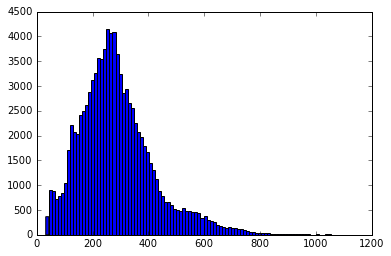

In [6]:
ET2 = ET[np.isnan(ET)==0]
plt.hist(ET2,100);

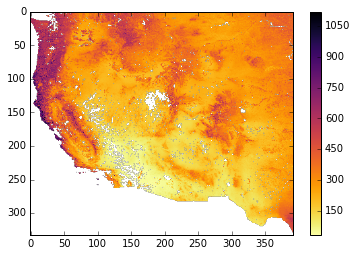

In [23]:
plt.imshow(ET, cmap = 'inferno_r', vmin=np.nanmin(ET),vmax=np.nanmax(ET))
plt.colorbar()

In [12]:
np.nanmin(ET)

32.375

In [13]:
np.nanmax(ET)

1120.0

inf